# Timeline plot buildings per country

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
# figure configuration
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set_context('notebook')
sns.set_style("ticks")

## Data preparation

### Create dictionaries with json files and geojson folders

In [3]:
# get the directory with downloaded data
os.chdir("..")
home_dir = os.getcwd()
data_dir = os.path.join(home_dir, "downloaded-data-json")


In [4]:
# create dictionary with json files
json_names = []
for (dir_path, dir_names, file_names) in os.walk(data_dir):
    json_names.extend(file_names)
print(json_names)

json_names.sort()

pattern = re.compile(r"^blds.+")
json_dic = {k: v for (k,v) in zip(range(len(json_names)), json_names) if pattern.match(v)}
json_dic

['blds_africa_states_18-23_ai.json', 'blds_continent_data_18-23_ai.json', 'blds_northamerica_states_18-23_ai.json', 'roads_asia_states_18-23_ai.json', 'roads_continent_data_18-23_ai.json', 'roads_europe_states_18-23_ai.json']


{0: 'blds_africa_states_18-23_ai.json',
 1: 'blds_continent_data_18-23_ai.json',
 2: 'blds_northamerica_states_18-23_ai.json'}

In [5]:
# create list of folders with geojson files
geojson_folder_lst = []
for (dir_path, dir_names, file_names) in os.walk(home_dir):  # give the path
    for dir_name in dir_names:
        # print(dir_name)
        pattern = re.compile(r"^geojson.+states$")
        
        if pattern.match(dir_name):
            # print(dir_name)
            geojson_folder_lst.append(dir_name)
geojson_folder_lst


['geojson-africa-states',
 'geojson-asia-states',
 'geojson-continent-states',
 'geojson-europe-states',
 'geojson-northamerica-states']

In [6]:
# create location list from json files
location_lst = []
for _json in json_dic.values():
    match = re.search(r"(?<=_)[^_]+(?=_)",
                      _json)
    if match:
        substring = match.group(0)
        print(substring)
        location_lst.append(substring)
location_lst

africa
continent
northamerica


['africa', 'continent', 'northamerica']

In [7]:
# create a a list with the selection of geojson folders
sel_geojson_folder_lst = []
for location in location_lst:
    # print(location)
    for folder in geojson_folder_lst:
        # print(folder)
        if location in folder:
            sel_geojson_folder_lst.append(folder)
sel_geojson_folder_lst.sort()


In [8]:
sel_geojson_folder_lst


['geojson-africa-states',
 'geojson-continent-states',
 'geojson-northamerica-states']

In [9]:
# create final geojson_folder_dic according to the json_dic
geojson_folder_dic = {k: v for (k, v) in zip(json_dic.keys(), sel_geojson_folder_lst)}
geojson_folder_dic


{0: 'geojson-africa-states',
 1: 'geojson-continent-states',
 2: 'geojson-northamerica-states'}

### Definitions

In [10]:
# user input definition

while True:
    user_d_spec = input(f"Which data do you want to plot?\
                            Enter the number of the json file:\n\
                            {json_dic}"
                        )
    try:
        user_d_spec = int(user_d_spec)
    except ValueError:
        print(f"You wrote: {user_d_spec}, please enter a number.")
        continue
    if user_d_spec not in json_dic.keys():
        print(
            f"You wrote: {user_d_spec}, please enter one of these numbers: {json_dic.keys()}.")
        continue
    break


In [11]:
# function definitions

def data_spec(data_dic):
    
    try:
        with open(f"downloaded-data\\{data_dic[user_d_spec]}", "r") as f:
            data = json.load(f)
        return data
    except Exception as e:
        print(e)
        print("Please download the data first.")


def get_geojson_names(home_dir, geojson_folder_dic):
    geojson_dir = os.path.join(home_dir, geojson_folder_dic[user_d_spec], "")

    geojson_names = []
    for (dir_path, dir_names, file_names) in os.walk(geojson_dir):  # give the path
        geojson_names.extend(file_names)
    print(geojson_names)
    return geojson_names


### Load the data

In [12]:
data = data_spec(json_dic)


### Edit the obtained data into desired shape to create a DataFrame

In [13]:
d = {
    "feature": [],
    "source": [],
    "timestamp": [],
    "value": []
}


In [14]:
for cont in data:
    for dic1 in cont:
        feature, source = dic1["groupByObject"][0], dic1["groupByObject"][1]
        for res in dic1["result"]:
            d["feature"].append(feature)
            d["source"].append(source)
            d["timestamp"].append(res["timestamp"])
            d["value"].append(res["value"])

df = pd.DataFrame(d)
# df

In [15]:
# extract only the year
df["year"] = pd.to_datetime(df["timestamp"]).dt.year

### Append the names of the regions to the DataFrame

In [16]:
# extract the geojson IDs and the names
geojson_names = get_geojson_names(home_dir, geojson_folder_dic)


['0_Ethiopia.geojson', '10_Democratic Republic of the Congo.geojson', '11_Namibia.geojson', '12_South Africa.geojson', '13_Libya.geojson', '14_Tunisia.geojson', '15_Zambia.geojson', '16_Sierra Leone.geojson', '17_Guinea.geojson', '18_Liberia.geojson', '19_Central African Republic.geojson', '1_South Sudan.geojson', '20_Sudan.geojson', '21_Djibouti.geojson', '22_Eritrea.geojson', '23_Ivory Coast.geojson', '24_Mali.geojson', '25_Senegal.geojson', '26_Nigeria.geojson', '27_Benin.geojson', '28_Angola.geojson', '29_Botswana.geojson', '2_Somalia.geojson', '30_Zimbabwe.geojson', '31_Chad.geojson', '32_Algeria.geojson', '33_Mozambique.geojson', '34_Eswatini.geojson', '35_Burundi.geojson', '36_Rwanda.geojson', '37_Uganda.geojson', '38_Lesotho.geojson', '39_Cameroon.geojson', '3_Kenya.geojson', '40_Gabon.geojson', '41_Niger.geojson', '42_Burkina Faso.geojson', '43_Togo.geojson', '44_Ghana.geojson', '45_Guinea-Bissau.geojson', '46_Egypt.geojson', '47_Mauritania.geojson', '48_Equatorial Guinea.geoj

In [17]:
geojson_names_2 = geojson_names

id_name_dic = {int(re.search(r'^\d+', k)[0]): re.search(r'\_.+\.', v)[0][1:-1]
                for k, v in zip(geojson_names, geojson_names_2)}
id_name_ser = pd.Series(id_name_dic)
id_name_df = pd.DataFrame(id_name_ser, columns=["name"])
id_name_df = id_name_df.reset_index().rename(columns={"index": "id"})
id_name_df["id"] = id_name_df["id"].astype(int)
# id_name_df


In [18]:
# merge df with region names based on ids
df = df.merge(id_name_df, how="left", left_on="feature",
               right_on="id")
df.head()

feature     source             timestamp     value  year  id      name
0        0  remainder  2018-01-01T00:00:00Z  284919.0  2018   0  Ethiopia
1        0  remainder  2019-01-01T00:00:00Z  350579.0  2019   0  Ethiopia
2        0  remainder  2020-01-01T00:00:00Z  395155.0  2020   0  Ethiopia
3        0  remainder  2021-01-01T00:00:00Z  470680.0  2021   0  Ethiopia
4        0  remainder  2022-01-01T00:00:00Z  629701.0  2022   0  Ethiopia

### Filtering the data

In [19]:
# exclude states which give zero in total
df = df.groupby("name", "source").filter(
    lambda x: x["value"].sum() != 0)


In [20]:
# get the number of AI Microsoft (source=microsoft/BuildingFootprints) / manually mapped (remainder) buildings for every year
grouped = df.groupby(["name", "year"])["value"].sum()
# grouped


In [21]:
# merge the DataFrame with groupBy DataFrame and compute the percentage
merged_data = df.merge(grouped, on=["name", 'year'], how='left', )
merged_data = merged_data.rename(columns={"value_x":"num_of_blds", "value_y":"total_blds"})
merged_data["percentage"] = (merged_data["num_of_blds"] / merged_data["total_blds"]) * 100
# merged_data.head(10)


In [22]:
# percentage verification
merged_data.groupby(["name", "year"])["percentage"].sum()


source                               year
remainder                            2018    100.0
                                     2019    100.0
                                     2020    100.0
                                     2021    100.0
                                     2022    100.0
                                     2023    100.0
source=microsoft/BuildingFootprints  2018      0.0
                                     2019      0.0
                                     2020      0.0
                                     2021    100.0
                                     2022    100.0
                                     2023    100.0
Name: percentage, dtype: float64

In [23]:
# create the dataframe by the source
df_rem = merged_data.loc[(df["source"] == "remainder"),:] # remainder = manually mapped buildings
df_ai = merged_data.loc[(df["source"] == "source=microsoft/BuildingFootprints") , :] # buiildings used from Microsoft AI
# df_ai.head()


In [24]:
# exclude states which give zero in total
# df_rem = df_rem.groupby("name").filter(
#     lambda x: x["num_of_blds"].sum() != 0)
# df_ai = df_ai.groupby("name").filter(
#     lambda x: x["num_of_blds"].sum() != 0)


In [25]:
# verify the sum
# df_rem.groupby("name")["num_of_blds"].sum().sort_values(ascending=True)


In [26]:
# verify the sum
# df_ai.groupby("name")["num_of_blds"].sum().sort_values(ascending=True)


In [27]:
# how the DataFrame looks like – manually mapped buildings
df_rem.head()


feature     source             timestamp  num_of_blds  year  id      name  \
0        0  remainder  2018-01-01T00:00:00Z     284919.0  2018   0  Ethiopia   
1        0  remainder  2019-01-01T00:00:00Z     350579.0  2019   0  Ethiopia   
2        0  remainder  2020-01-01T00:00:00Z     395155.0  2020   0  Ethiopia   
3        0  remainder  2021-01-01T00:00:00Z     470680.0  2021   0  Ethiopia   
4        0  remainder  2022-01-01T00:00:00Z     629701.0  2022   0  Ethiopia   

   total_blds  percentage  
0  28793553.0    0.989524  
1  43530237.0    0.805369  
2  53601135.0    0.737214  
3  66684246.0    0.705834  
4  79452442.0    0.792551

In [28]:
# how the DataFrames look like – AI Microsoft buildings
df_ai.head()


feature                               source             timestamp  \
6         0  source=microsoft/BuildingFootprints  2018-01-01T00:00:00Z   
7         0  source=microsoft/BuildingFootprints  2019-01-01T00:00:00Z   
8         0  source=microsoft/BuildingFootprints  2020-01-01T00:00:00Z   
9         0  source=microsoft/BuildingFootprints  2021-01-01T00:00:00Z   
10        0  source=microsoft/BuildingFootprints  2022-01-01T00:00:00Z   

    num_of_blds  year  id      name  total_blds  percentage  
6           0.0  2018   0  Ethiopia         0.0         NaN  
7           0.0  2019   0  Ethiopia         0.0         NaN  
8           0.0  2020   0  Ethiopia         0.0         NaN  
9           0.0  2021   0  Ethiopia    219684.0         0.0  
10          0.0  2022   0  Ethiopia    270325.0         0.0

## Plots

### Manually mapped buildings

In [29]:
# verify the sum
# df_rem.groupby("year")["num_of_blds"].sum().loc[2023] == df_rem.loc[df_rem["year"] == 2023, "total_blds"]


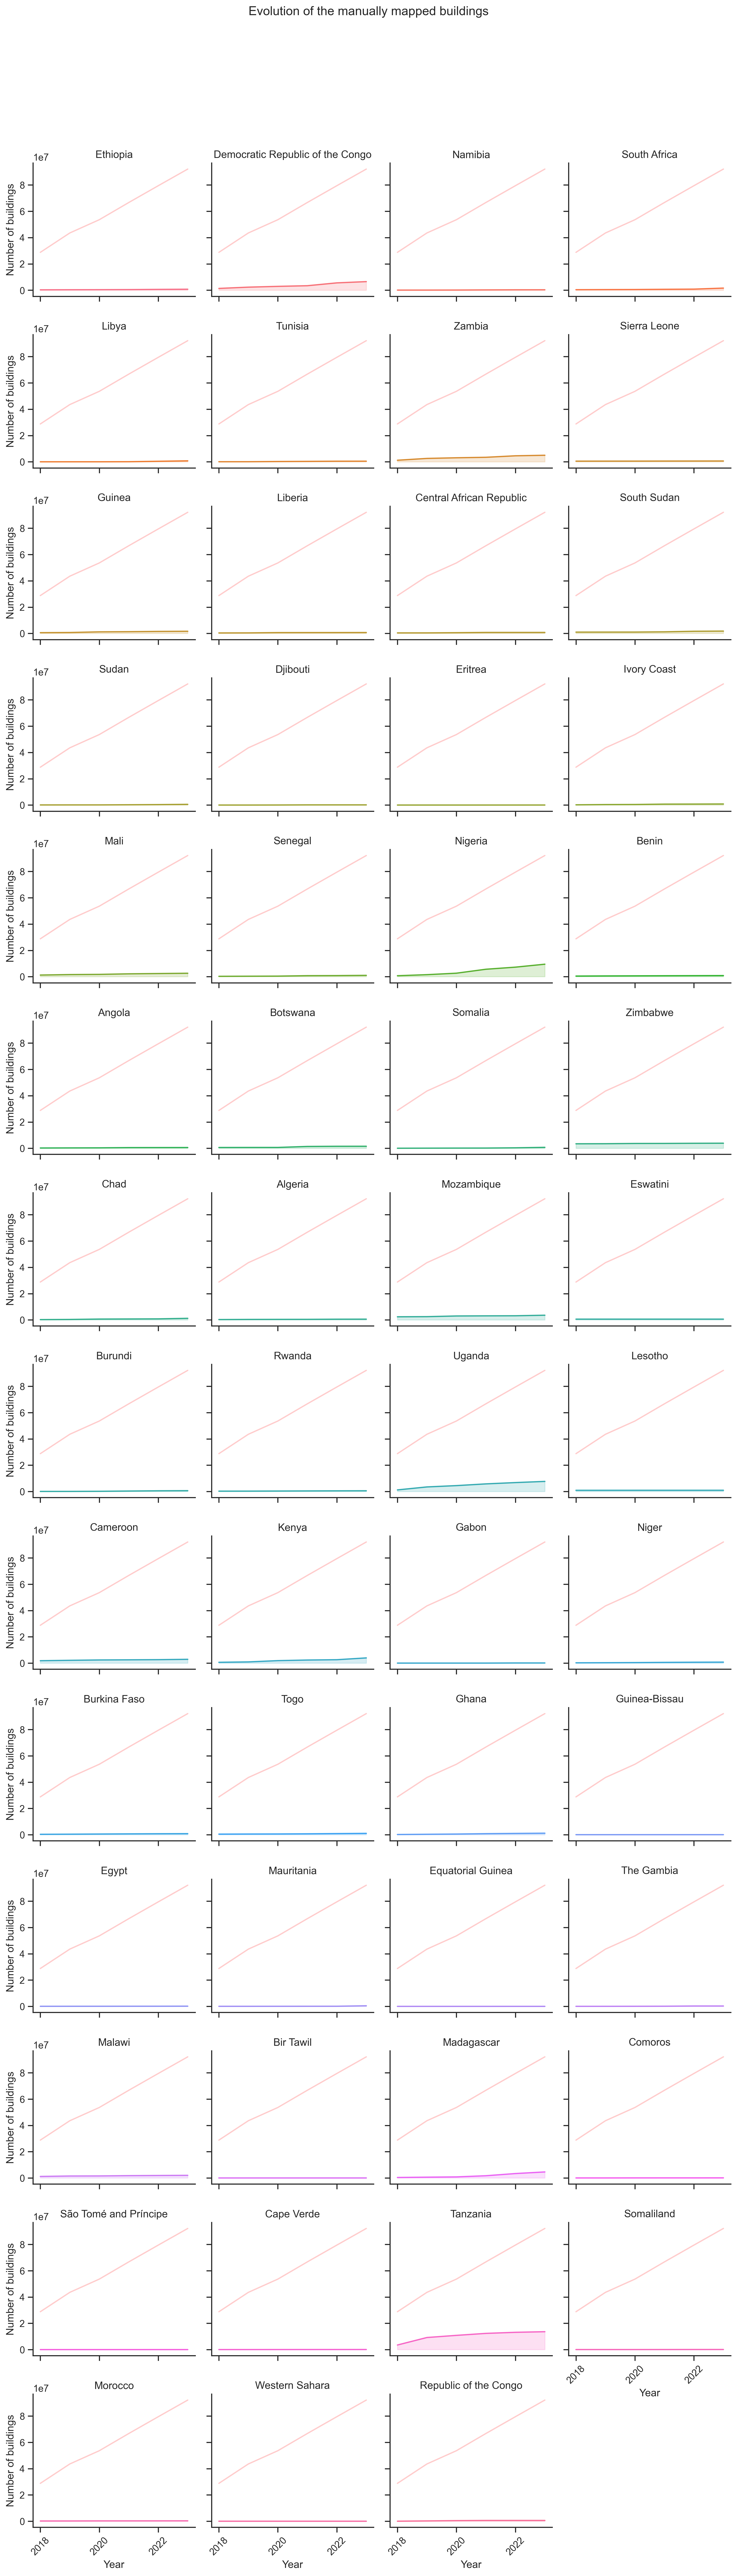

In [30]:
# create a grid : initialize it
g = sns.FacetGrid(df_rem, col='name', hue='name', col_wrap=4, )

# add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'num_of_blds')

# fill the area with fill_between
g = g.map(plt.fill_between, 'year', 'num_of_blds',
          alpha=0.2)

# plot the sum line over the plot
g = g.map(plt.plot, 'year', 'total_blds', color='red', alpha=0.2)

# # add the line over the area with the plot function
# g = g.map(plt.plot, 'year', 'total_blds')

# # fill the area with fill_between
# g = g.map(plt.fill_between, 'year', 'total_blds',
#           alpha=0.2)

# rotate the xticklabels
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]

# set subtitles using the get_subtitle function
g.set_titles("{col_name}")

# add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the manually mapped buildings')

# set the axes titles
axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of buildings")
    # ax.set_ylim(100)

# show the graph
plt.show()


#### Try to add summary plot

In [31]:
df_rem_tot = df_rem.groupby("year")["total_blds"].last().reset_index()
df_rem_tot

year  total_blds
0  2018  28793553.0
1  2019  43530237.0
2  2020  53601135.0
3  2021  66684246.0
4  2022  79452442.0
5  2023  92110091.0

C:\Users\milan\AppData\Local\Temp\ipykernel_16420\2071086106.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(11, 6, 66)
C:\Users\milan\AppData\Local\Temp\ipykernel_16420\2071086106.py:42: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


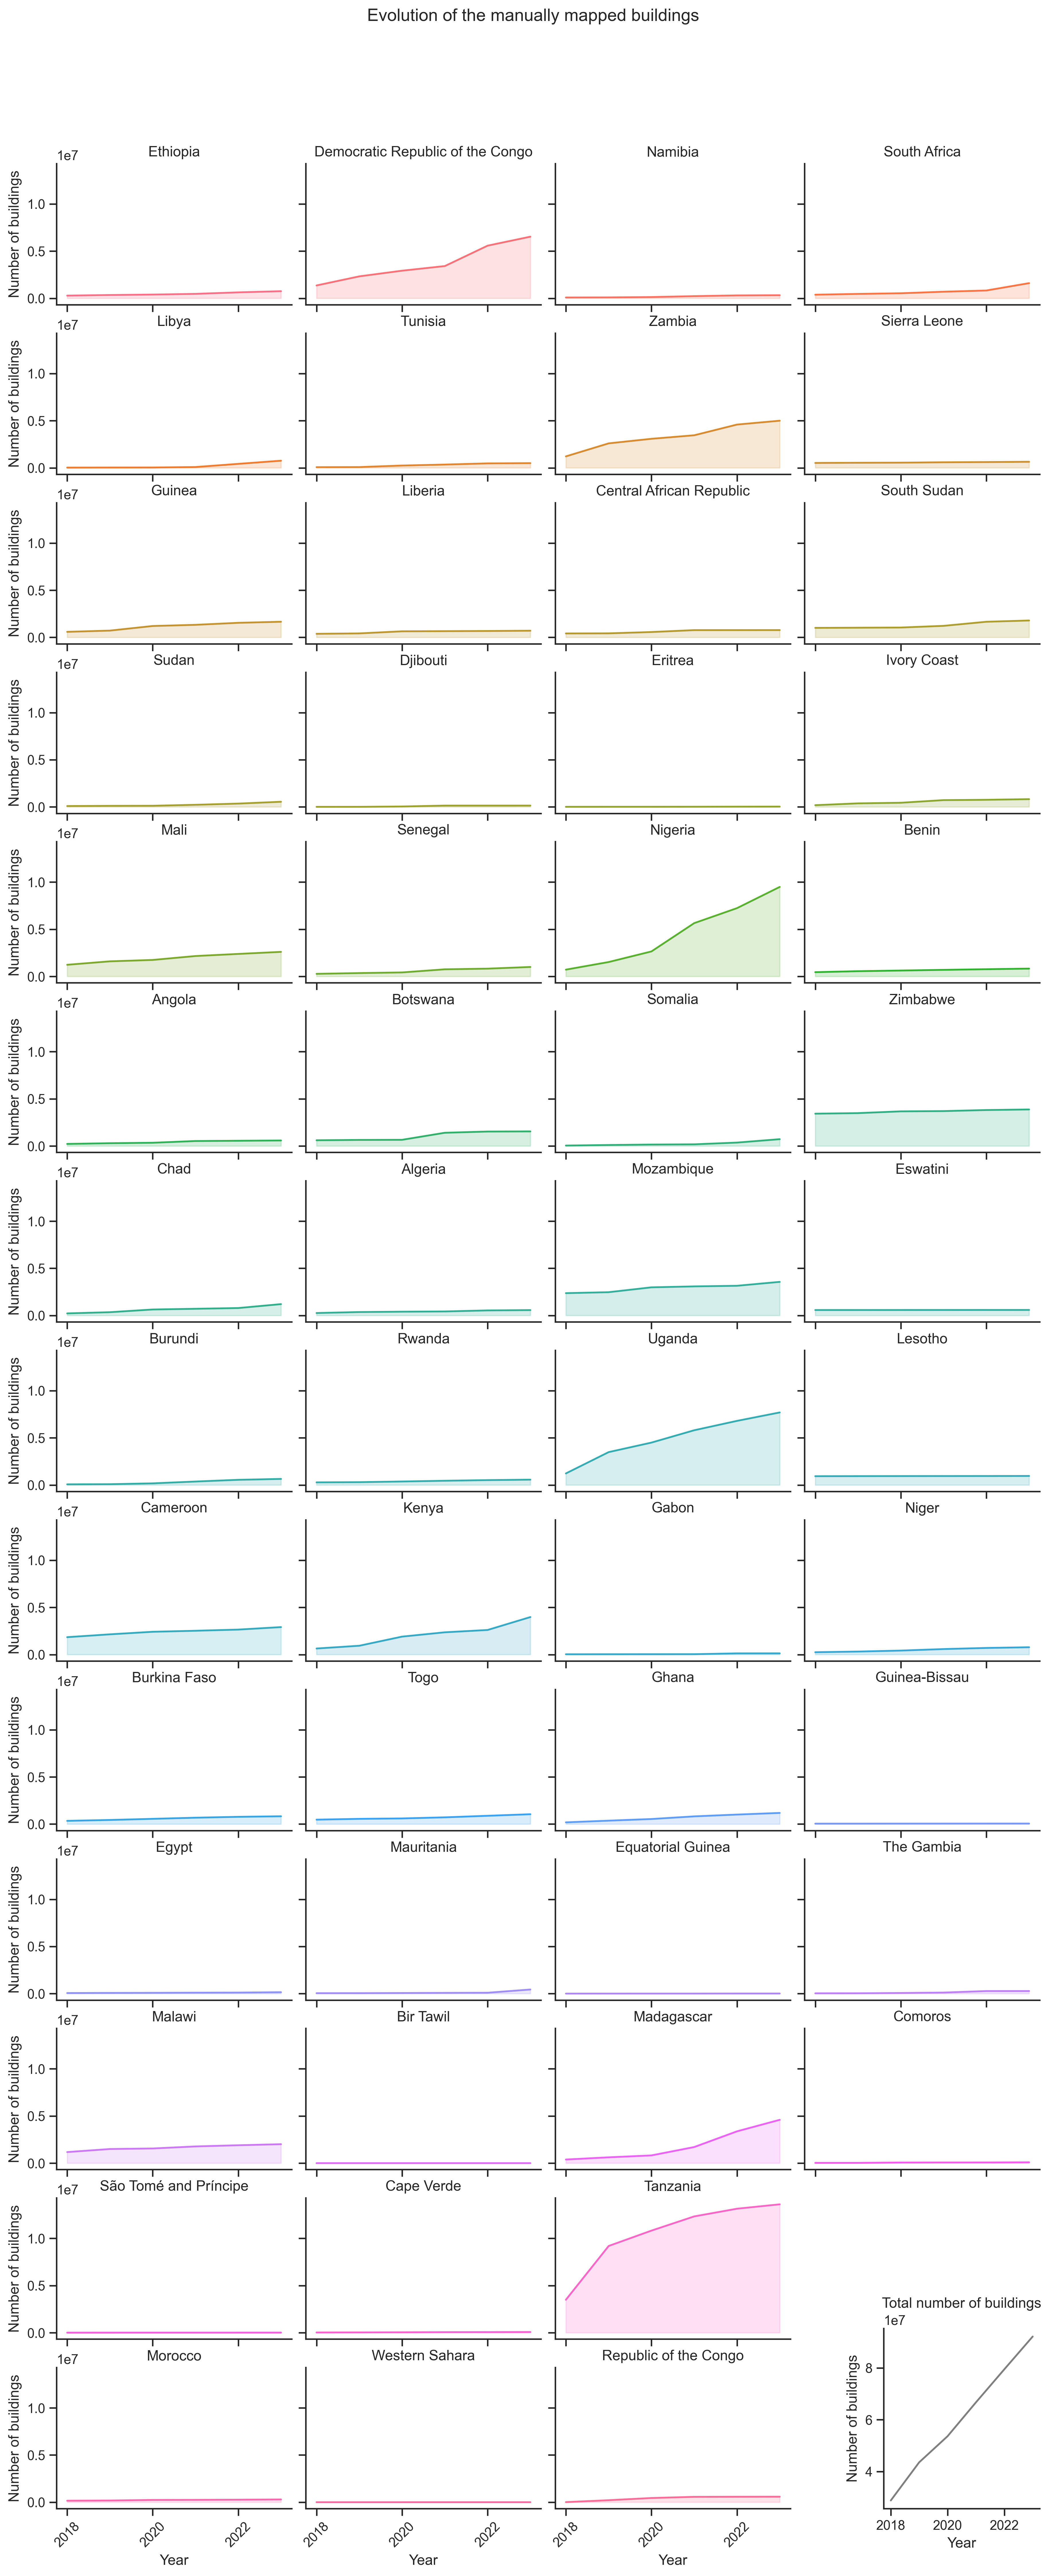

In [32]:
# create a FacetGrid for the first dataframe
g = sns.FacetGrid(df_rem, col='name', hue='name',
                  col_wrap=4, height=4, aspect=1.2)

# plot the data on the FacetGrid
g = g.map(plt.plot, 'year', 'num_of_blds')
g = g.map(plt.fill_between, 'year', 'num_of_blds', alpha=0.2)

# set the x-axis labels to be rotated
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]

# set the titles for each subplot based on the 'name' column
g.set_titles("{col_name}")

# add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the manually mapped buildings')

# set the axes titles and limits
axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of buildings")
    # ax.set_ylim(100)

# create a new plot axis for the second dataframe
ax2 = plt.subplot(11, 6, 66)

# plot the data from the second dataframe on the new axis
sns.lineplot(data=df_rem_tot, x='year',
             y='total_blds', color='black', alpha=0.5)

# set the title and axes labels for the new plot axis
ax2.set_title('Total number of buildings')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of buildings')

# remove the top and right spines of all subplots
sns.despine()

# adjust the layout of the subplots
plt.tight_layout()

# adjust the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 30)

# show the plot
plt.show()


### Microsoft AI buildings

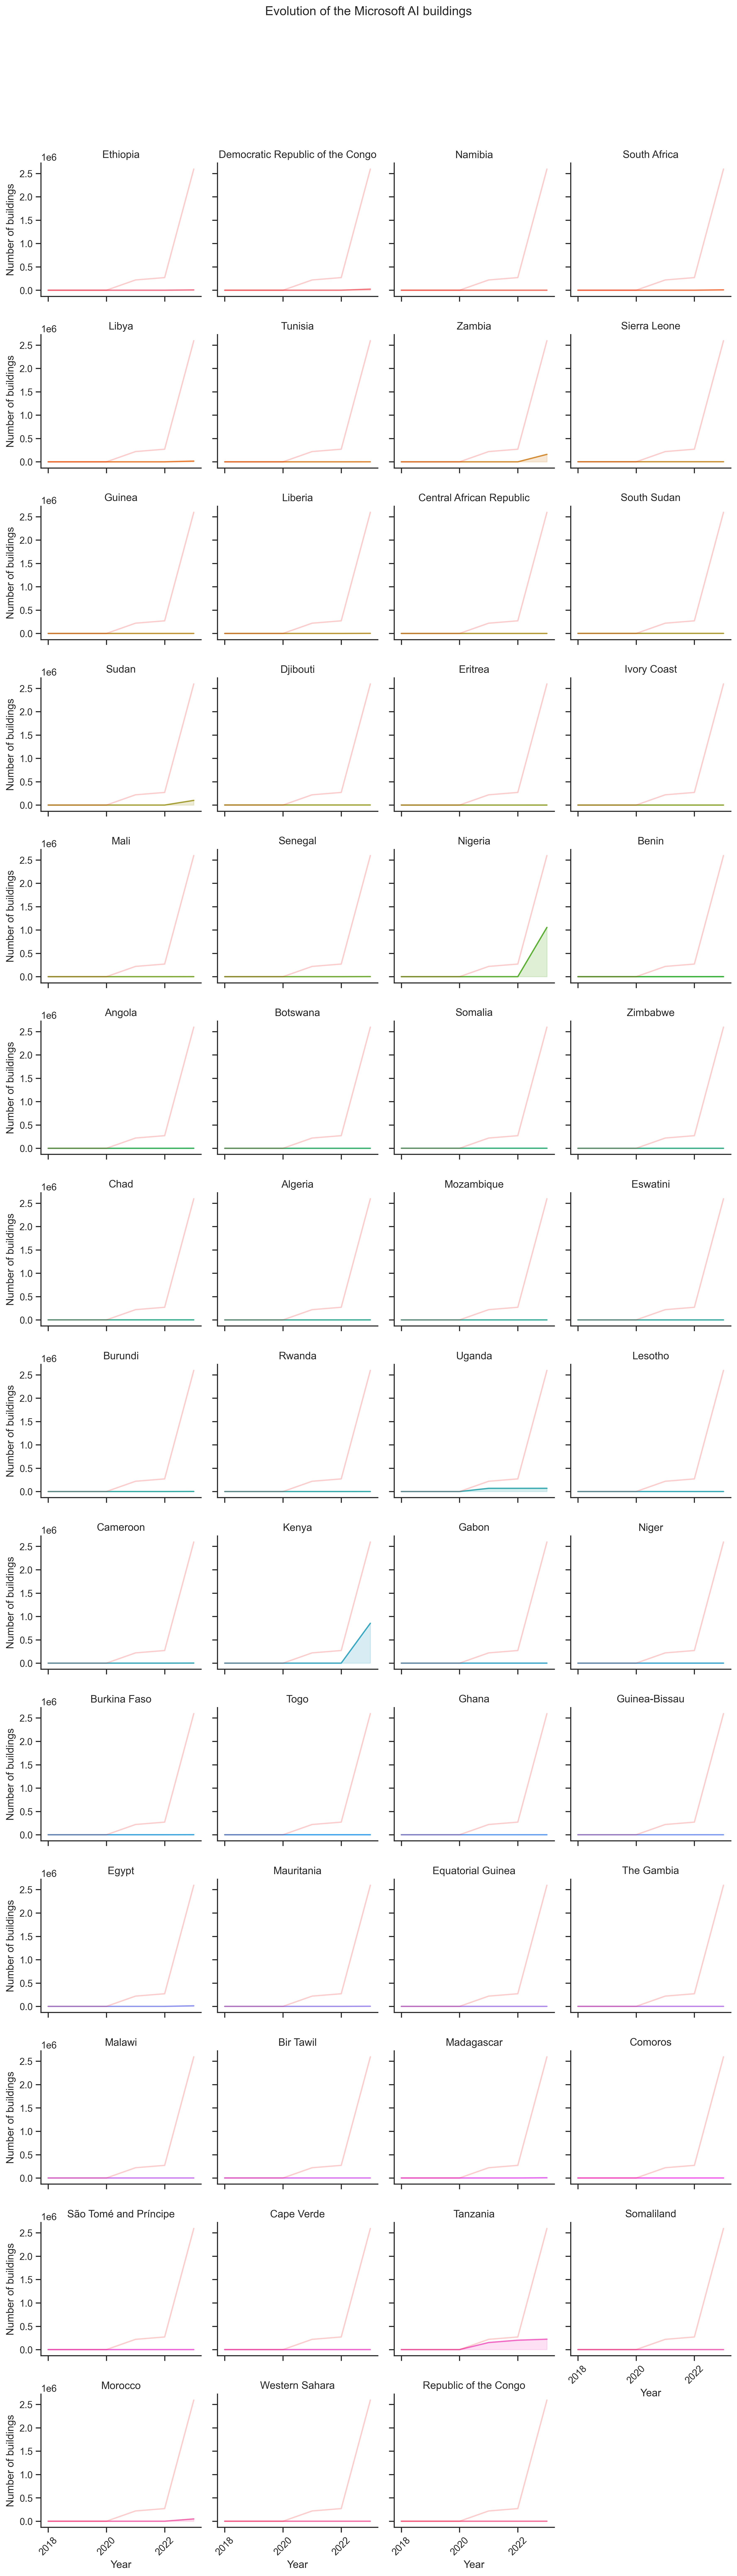

In [33]:
# create a grid : initialize it
g = sns.FacetGrid(df_ai, col='name', hue='name', col_wrap=4, )

# add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'num_of_blds')

# fill the area with fill_between
g = g.map(plt.fill_between, 'year', 'num_of_blds',
          alpha=0.2)

# plot the sum line over the plot
g = g.map(plt.plot, 'year', 'total_blds', color='red', alpha=0.2)

# rotate the xticklabels
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]

# set subtitles using the get_subtitle function
g.set_titles("{col_name}")

# add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the Microsoft AI buildings')

# set the axes titles
axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of buildings")
    # ax.set_ylim(100)

# Calculate and add total values to each subplot

# for ax in g.axes.flat:
#     # Calculate total values for each day and sex
#     totals = df_ai.groupby(['year'])[['num_of_blds']].sum()
#     # Get the day and sex for the current subplot
#     day, sex = ax.get_title().split(' = ')
#     # Add the total values to the current subplot
#     ax.text(0.05, 0.95, f"Total: ${totals.loc[day, sex]['total_bill']:.2f}, Tip: ${totals.loc[day, sex]['tip']:.2f}",
#             transform=ax.transAxes, fontsize=10, verticalalignment='top')



# show the graph
plt.show()


#### Try to add summary plot

In [34]:
df_ai_tot = df_ai.groupby("year")["total_blds"].last().reset_index()
df_ai_tot

year  total_blds
0  2018         0.0
1  2019         0.0
2  2020         0.0
3  2021    219684.0
4  2022    270325.0
5  2023   2593774.0

C:\Users\milan\AppData\Local\Temp\ipykernel_16420\1766372436.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(11, 6, 66)
C:\Users\milan\AppData\Local\Temp\ipykernel_16420\1766372436.py:42: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


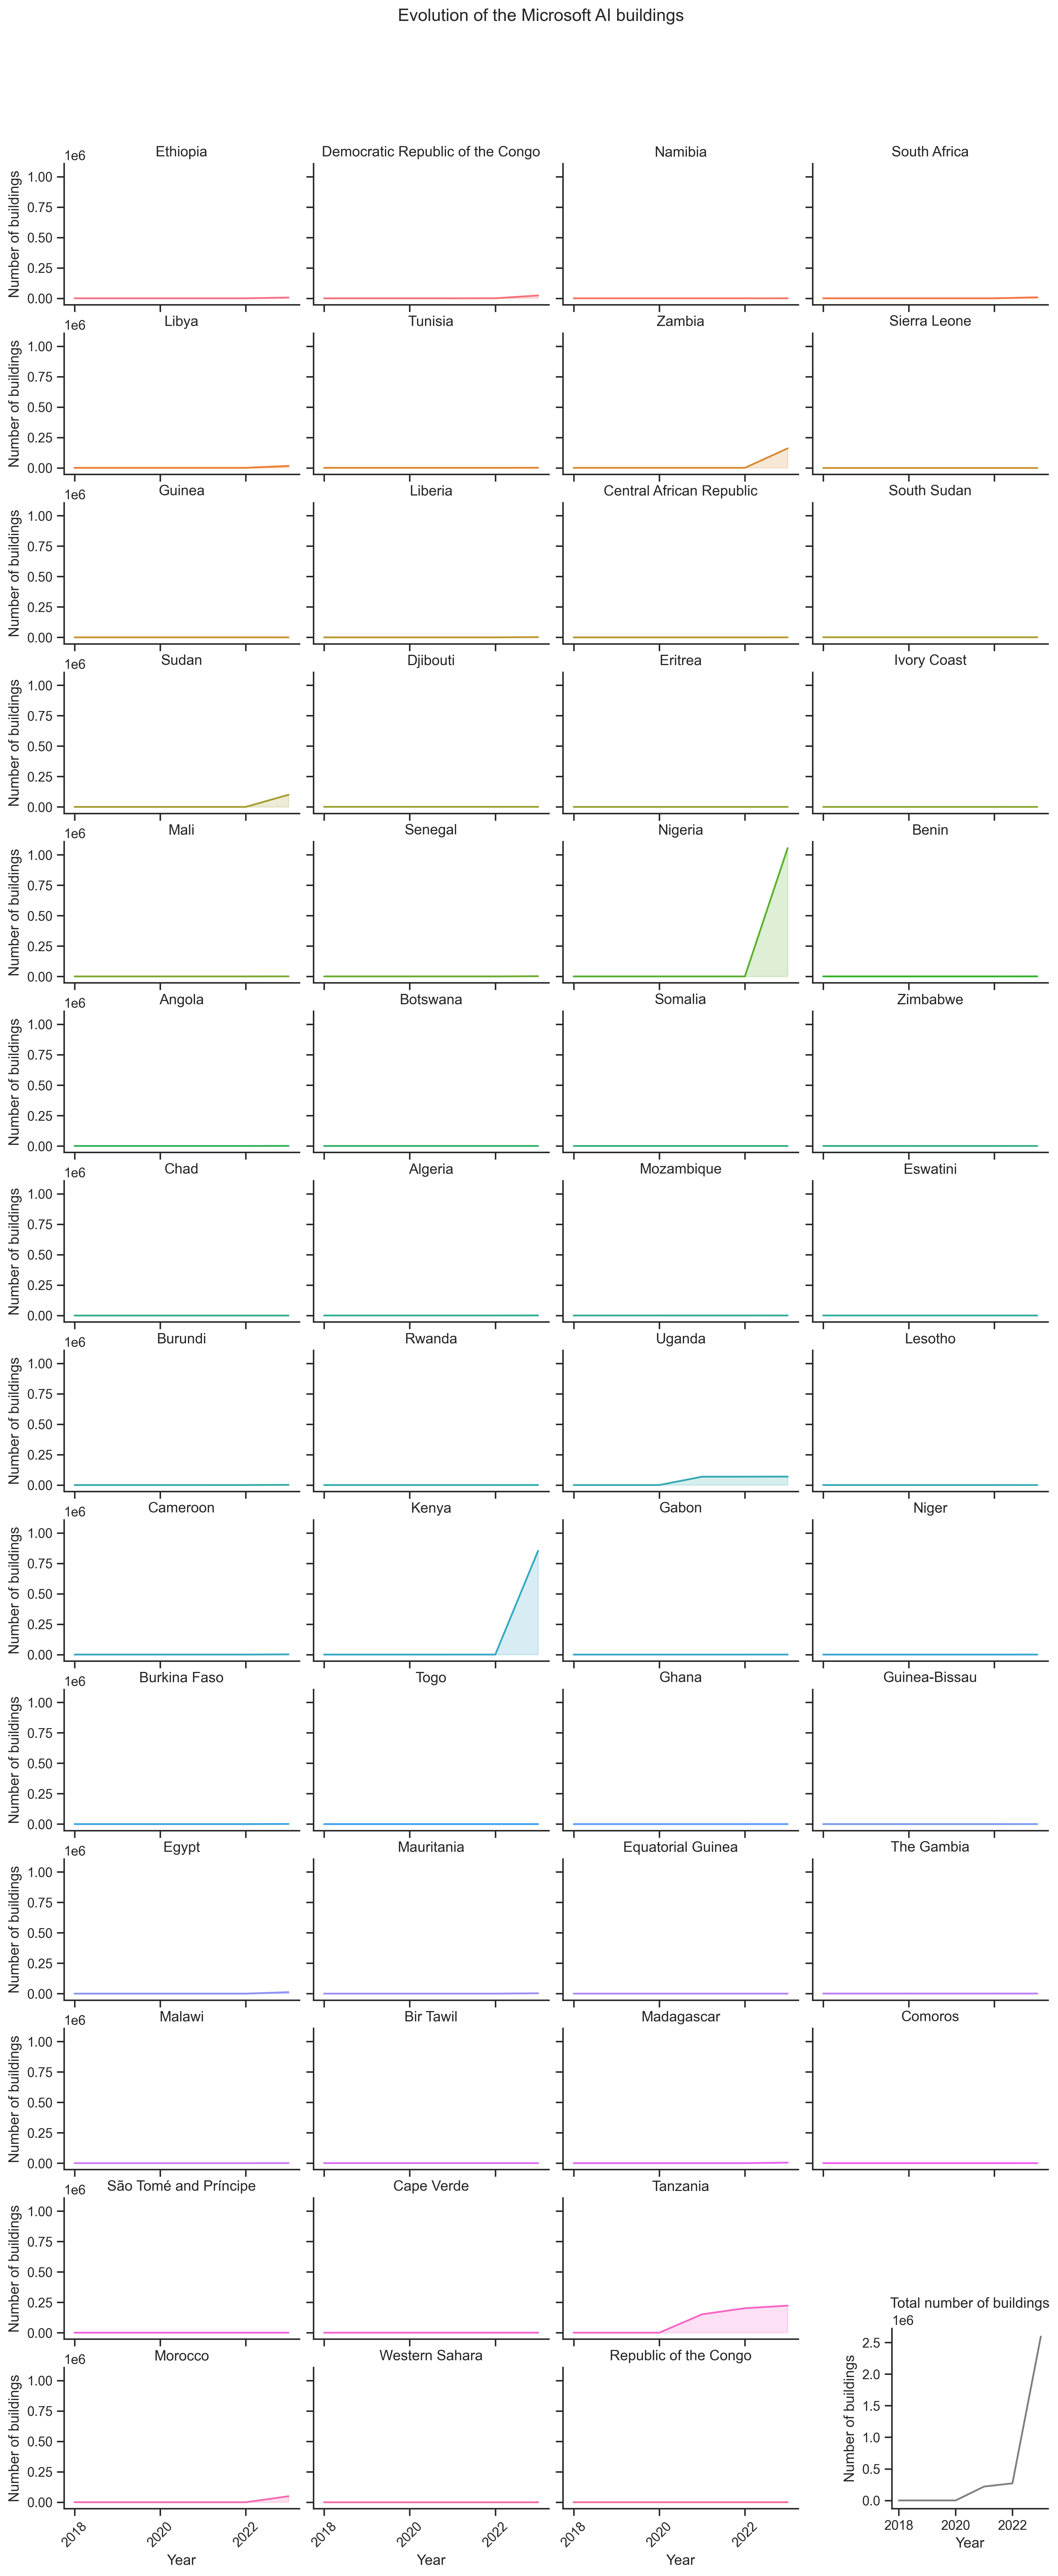

In [35]:
# create a FacetGrid for the first dataframe
g = sns.FacetGrid(df_ai, col='name', hue='name',
                  col_wrap=4, height=4, aspect=1.2)

# plot the data on the FacetGrid
g = g.map(plt.plot, 'year', 'num_of_blds')
g = g.map(plt.fill_between, 'year', 'num_of_blds', alpha=0.2)

# set the x-axis labels to be rotated
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]

# set the titles for each subplot based on the 'name' column
g.set_titles("{col_name}")

# add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the Microsoft AI buildings')

# set the axes titles and limits
axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of buildings")
    # ax.set_ylim(100)

# create a new plot axis for the second dataframe
ax2 = plt.subplot(11, 6, 66)

# plot the data from the second dataframe on the new axis
sns.lineplot(data=df_ai_tot, x='year',
             y='total_blds', color='black', alpha=0.5)

# set the title and axes labels for the new plot axis
ax2.set_title('Total number of buildings')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of buildings')

# remove the top and right spines of all subplots
sns.despine()

# adjust the layout of the subplots
plt.tight_layout()

# adjust the size of the figure
fig = plt.gcf()
fig.set_size_inches(12, 30)

# show the plot
plt.show()


### Microsoft AI and Manually mapped buildings together

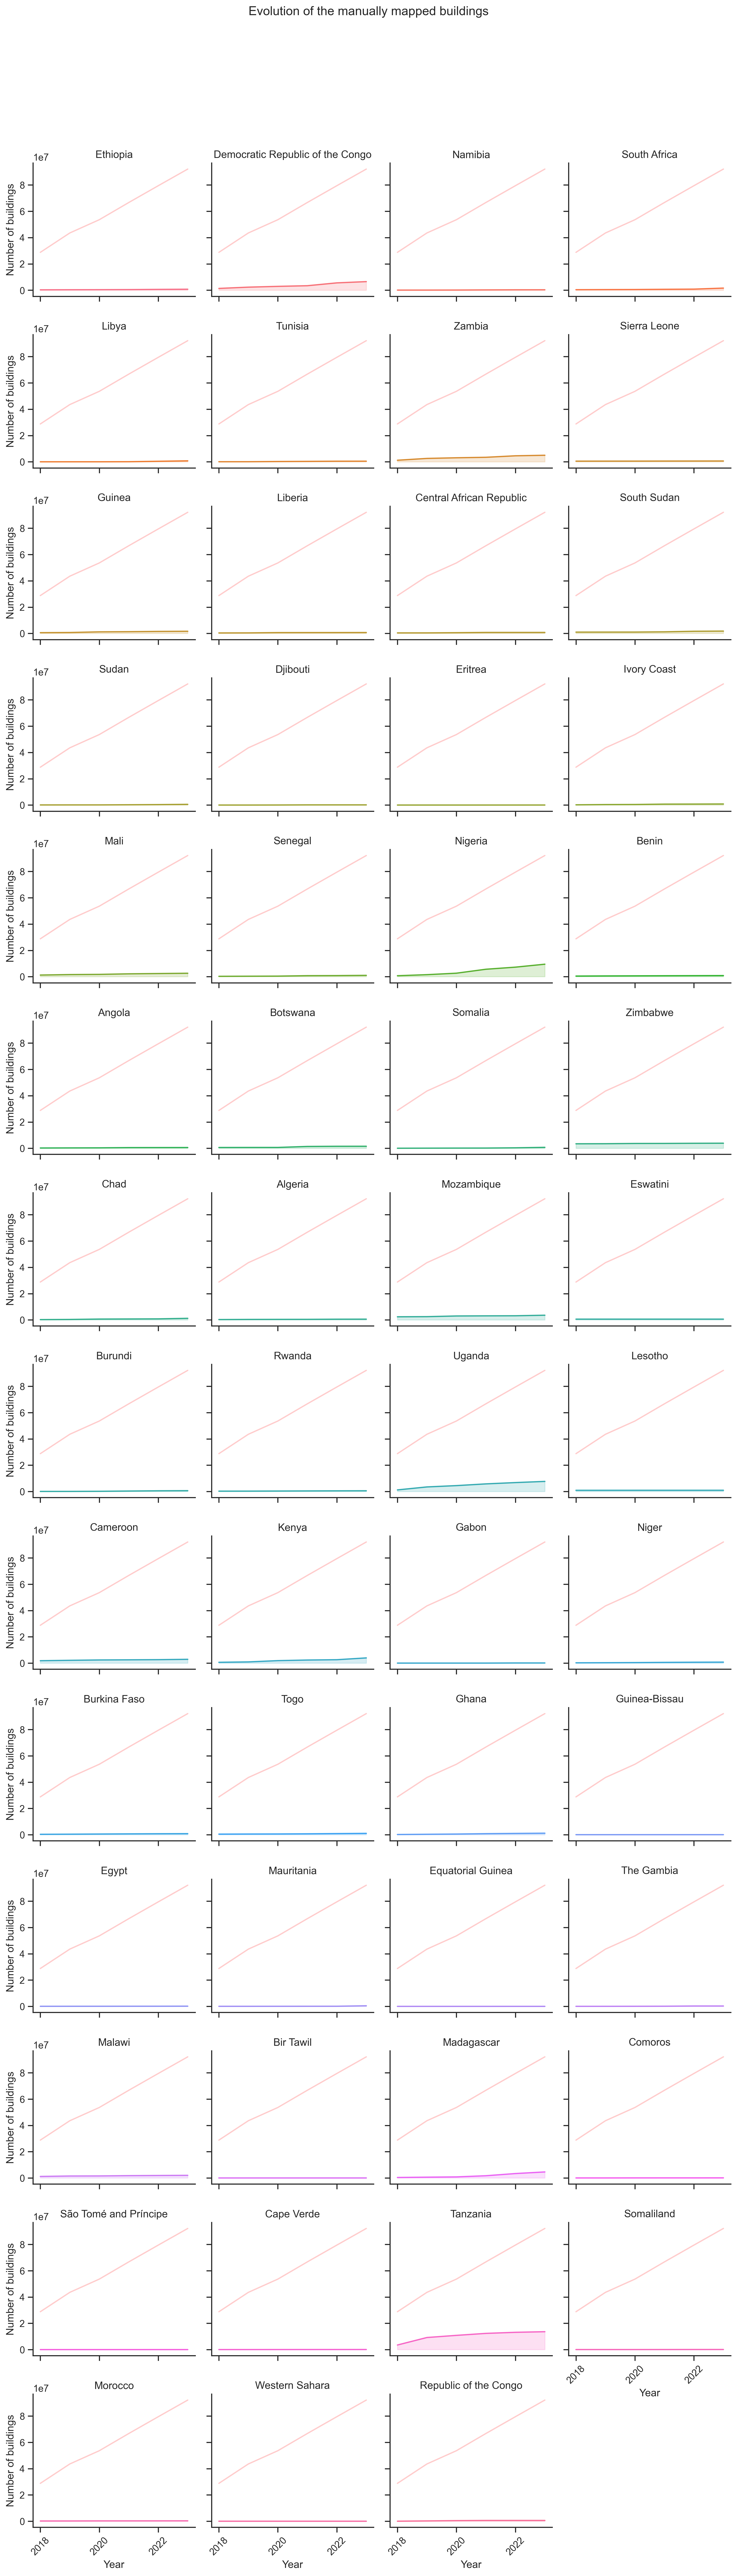

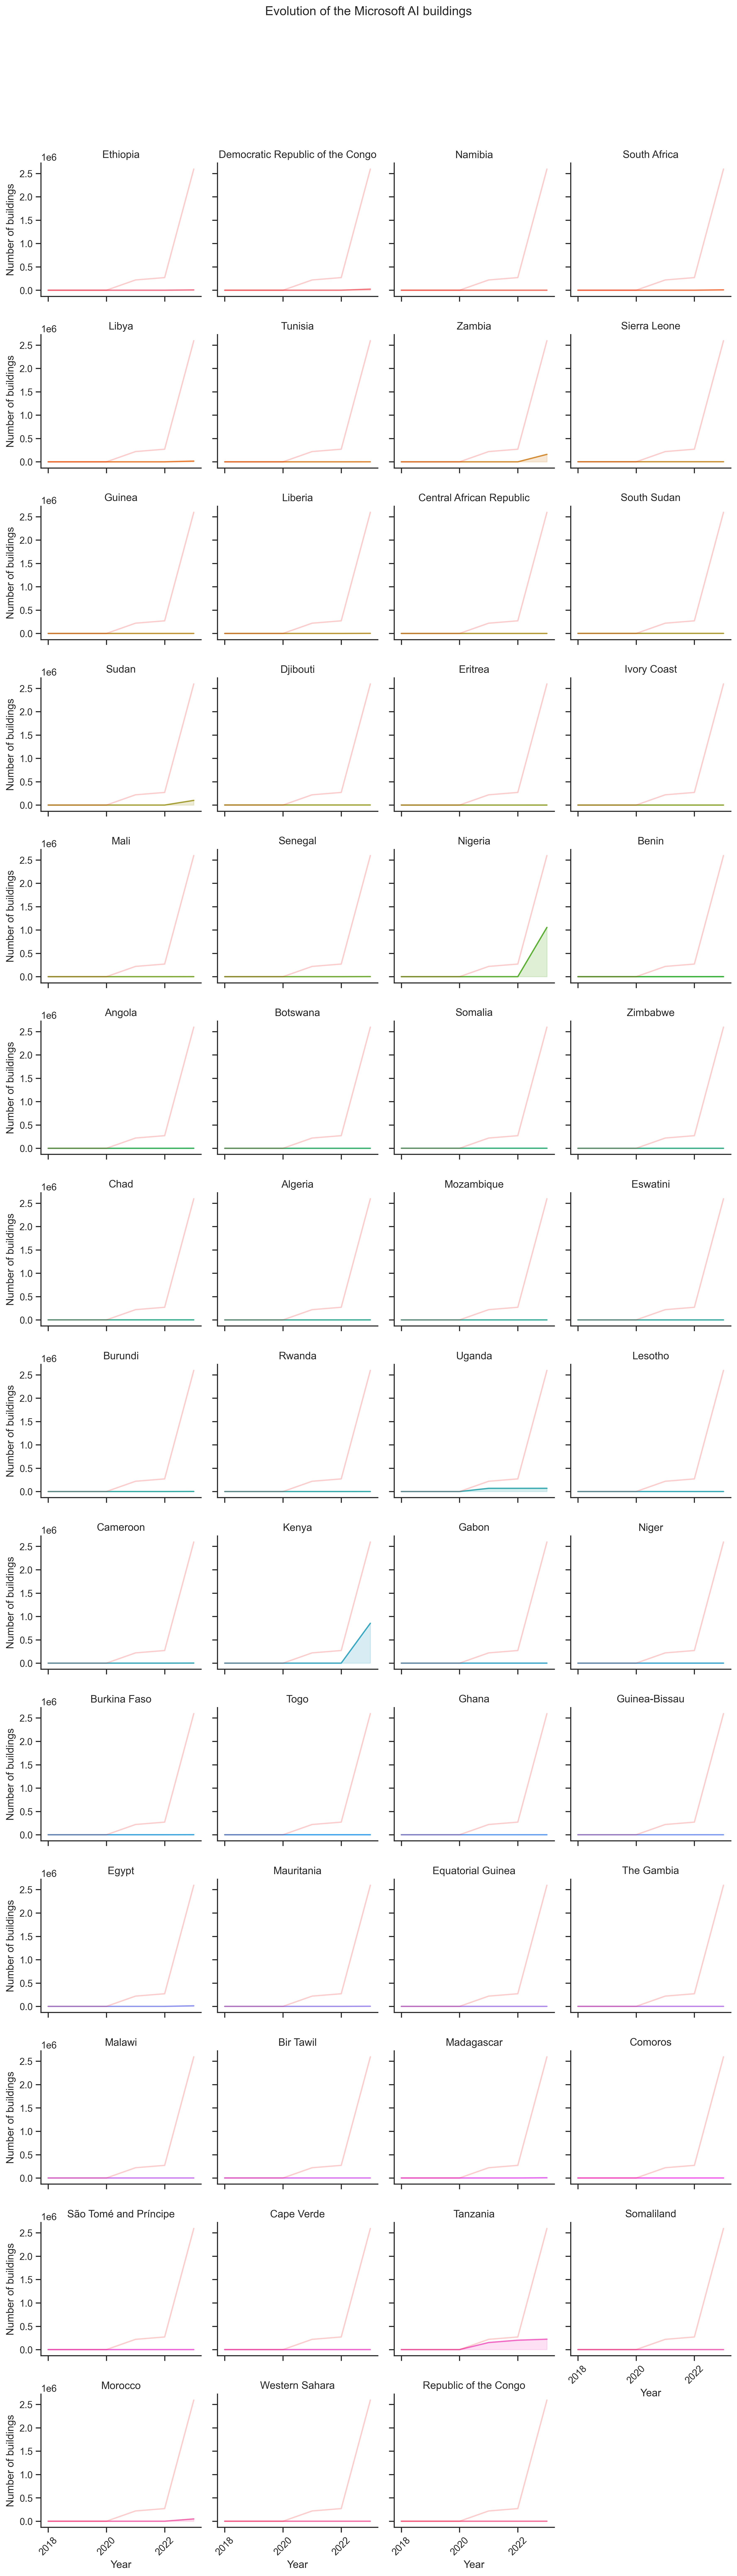

In [36]:
# create a grid : initialize it
g = sns.FacetGrid(df_rem, col='name', hue='name', col_wrap=4, )

# add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'num_of_blds')

# fill the area with fill_between
g = g.map(plt.fill_between, 'year', 'num_of_blds',
          alpha=0.2)#.set_titles("{col_name}")

# plot the sum line over the plot
g = g.map(plt.plot, 'year', 'total_blds', color='red', alpha=0.2)

# g.set(ylim=(0, 100))

# rotate the xticklabels
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]

# set subtitles using the get_subtitle function
g.set_titles("{col_name}")

# add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the manually mapped buildings')

# set the axes titles
axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of buildings")
    # ax.set_ylim(100)

# Show the graph
plt.show()


# create a grid : initialize it
g = sns.FacetGrid(df_ai, col='name', hue='name', col_wrap=4, )

# add the line over the area with the plot function
g = g.map(plt.plot, 'year', 'num_of_blds')

# fill the area with fill_between
g = g.map(plt.fill_between, 'year', 'num_of_blds',
          alpha=0.2)  # .set_titles("{col_name}")

# plot the sum line over the plot
g = g.map(plt.plot, 'year', 'total_blds', color='red', alpha=0.2)

# g.set(ylim=(0,100))

# rotate the xticklabels
[plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]

# set subtitles using the get_subtitle function
g.set_titles("{col_name}")

# add a title for the whole plot
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Evolution of the Microsoft AI buildings')

# set the axes titles
axes = g.axes.flatten()
for ax in axes:
    ax.set_xlabel("Year")
    ax.set_ylabel("Number of buildings")

# show the graph
plt.show()
